In [1]:
%%time
# This is the code you want to measure the execution time of
for i in range(1000000):
    x = i ** 2
    
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#to get rid of chained assignment errors
pd.options.mode.chained_assignment = None  # default='warn'
df = pd.read_csv('data/survey_results_public.csv')
schema_df = pd.read_csv('data/survey_results_schema.csv', index_col='qname')
df.set_index('ResponseId', inplace=True)
pd.set_option('display.max_columns',85)# applys to both df's schema and results
pd.set_option('display.max_rows',85) # applys to both df's schema and results

# looking at general Df, getting the count of total responses to put counts into perspective:
#df.columns
#schema_df.columns
#display(df.shape)
#display(schema_df.shape)
#df.head(10)
#schema_df(10)

# looking at country list, and how many have non np.NAN answers:
#print(df['Country'].unique())
#display(df['Country'].count())
#note there are 1497 NaN's


# looking at countries with the most responses, taking top 45 for now, getting total sum from those 45:
#display(df['Country'].value_counts(dropna=False,sort=True,ascending=False).head(45))
#display(np.sum(df['Country'].value_counts(dropna=True,sort=True,ascending=False).head(45)))

# Creating a df_45 DataFrame of the countries and thier respective number of partisipants.(Where I will add aggragated data): 
a = df['Country'].value_counts(dropna=True)
#display(a)
#print(type(a)) 
df_45 = a.to_frame().rename(columns={'Country': 'Count'}) #this turns series into a Df
#print(type(df_45))
# Removing unwated rows (coutries with low partisipation):
filt = df_45['Count']>316
test= df_45[filt]
#display(test)
# Setting up df_45:
df_45 = test
df_45.shape
df_45 = df_45.reset_index()
df_45 = df_45.rename(columns={'index': 'Country'})
#df_45

# Creatig a list of the countries: 
countries = test.index.tolist()
# looking at list:
display(countries)

# Updating original DF to only include rows from the 45 chosen countries
filt2 = df['Country'].isin(countries)
df_whole_45 = df[filt2]
#df_whole_45

# 64084 matches sum from above, should be correct
#df_whole_45.shape

['United States of America',
 'India',
 'Germany',
 'United Kingdom of Great Britain and Northern Ireland',
 'Canada',
 'France',
 'Brazil',
 'Poland',
 'Netherlands',
 'Spain',
 'Italy',
 'Australia',
 'Russian Federation',
 'Turkey',
 'Sweden',
 'Switzerland',
 'Austria',
 'Israel',
 'Iran, Islamic Republic of...',
 'Pakistan',
 'Czech Republic',
 'China',
 'Belgium',
 'Bangladesh',
 'Ukraine',
 'Romania',
 'Mexico',
 'Portugal',
 'Greece',
 'Denmark',
 'Indonesia',
 'Argentina',
 'Nigeria',
 'South Africa',
 'Norway',
 'Finland',
 'Hungary',
 'New Zealand',
 'Egypt',
 'Philippines',
 'Bulgaria',
 'Colombia',
 'Japan',
 'Ireland',
 'Viet Nam']

CPU times: total: 2.91 s
Wall time: 3.05 s


In [2]:
#getting some specifics on Df_45 changes
#df['Country'].nunique() #180 total original country answers 

df.shape # (73268, 78)
df_whole_45.shape # (64084, 78)

(64084, 78)

In [3]:
df.columns

Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysProfessional use', 'OpSysPersonal use', 'VersionControlSystem',
       'VCInteraction', 'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStack

In [4]:

### % Fully Remote:

# Group by country:
country_grp = df_whole_45.groupby(['Country'])

# Creating a series for the fractions/percentages of work locations for each country:
remote_work_perc = country_grp['RemoteWork'].value_counts(normalize=True) # normalize=True, puts it into a fraction
# Looking at the series fractions/percentages of work locations for each country:
#print((remote_work_perc))

# filter the series (remote_work_perc) DataFrame to only include rows where the value of the 'RemoteWork' column is 'Fully remote':
fully_remote_perc = remote_work_perc.loc[:, 'Fully remote'].rename('fully_remote_perc')
# Looking at the series where the value of the 'RemoteWork' column is 'Fully remote'
#print(type(fully_remote_perc))
#print((fully_remote_perc))

# Fully remote series added to df_45
# Join the series fully_remote_perc with the df_45:
df_45 = df_45.join(fully_remote_perc, on='Country')
# Create a count of participation: 
Work_Location_Count = country_grp['RemoteWork'].count().rename('Work_Location Count_nonNA')
#print(type(Work_Location_Count))
# Join the series Work_Location_Count with the df_45:
df_45 = df_45.join(Work_Location_Count, on='Country')



In [5]:
### Salary Investigaation ###:
# Setting options to keep results in floats not scientific notation:
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
# Looking at currencies in the new df to see how many I need to look up:
#print(df_whole_45['Currency'].unique())
#print(df_whole_45['Currency'].value_counts())


# Define dict of currency converters:
currencies_converters = {'EUR': .93, 'USD': 1, 'INR': 82.31, 'GBP': .82,'CAD': 1.37, 'BRL': 5.25, 'PLN': 4.39, 'AUD': 1.5,
                         'SEK': 10.4, 'RUB': 80.2, 'CHF': .91, 'TRY': 19.24,'ILS' : 3.58, 'CZK': 21.47, 'IRR': 42250,
                         'PKR': 288.25, 'DKK': 6.83,'MXN': 18.31, 'NOK': 10.44,'ZAR': 18.05, 'NZD':1.58, 'RON': 4.53, 'BDT': 107.52, 'HUF': 344.99 ,
                         'CNY': 6.88, 'IDR': 14959, 'UAH': 36.95 , 'JPY': 131.30, 'ARS': 211.23, 'BGN': 1.79, 'COP': 4584.75, 'PHP': 54.50,
                         'EGP': 30.90, 'NGN': 464.50, 'VND': 23467.50, 'AED': 3.67} # taken from google converter 3/14/2023 and 4/5

# Triming unneeded characters from 'Currency':
df_whole_45['Currency'] = df_whole_45['Currency'].str[:3]

# Function to convert currency:
def convert_currency(currency):
    if currency in currencies_converters:
        return currencies_converters[currency]
    else:
        return np.NaN  # using np.NaN instead of NaN
    
# Add new 'CurrencyConvert' column to DataFrame using apply() method:
df_whole_45['CurrencyConvert'] = df_whole_45['Currency'].apply(convert_currency)

#schema_df.loc['CompTotal']['question']
#OUTPUT: 'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? 
#         Please enter a whole number in the box below, without any punctuation.  
#         If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary.
#         If you prefer not to answer, please leave the box empty.'


#schema_df.loc['CompFreq']['question']
#OUTPUT: 'Is that compensation weekly, monthly, or yearly?'


# Function to adjust pay from interval to yearly:
# Note, there seems to be little consistancy with responses on salary,
#       it appears some answered with their yearly pay amount and specified the interval payments are recieved,
#       while others answered the amount they are paid at each interval(intention of questions)...
#       As well as people who blantantly provided missinformation. 

def get_interval(interval):
    if pd.isna(interval):
        return np.NaN
    elif interval == "Yearly":
        return 1
    elif interval == "Monthly":
        return 12
    elif interval == "Weekly":
        return 52
    else:
        raise ValueError("Invalid interval value: {}".format(interval))
        
        
        
# Use function - testing if the comp freq gets more results when removed:
df_whole_45['YearlyTotConvertCOMP'] = (1/df_whole_45['CurrencyConvert']) * df_whole_45['CompTotal'] * df_whole_45['CompFreq'].apply(get_interval)
# Use function - testing if the comp freq gets more results when removed:
#df_whole_45['YearlyTotConvertCOMP'] = (1/df_whole_45['CurrencyConvert']) * df_whole_45['CompTotal'] 
#trying to get rid of scientific notation again:
df_whole_45['YearlyTotConvertCOMP'] = df_whole_45['YearlyTotConvertCOMP'].apply(lambda x: float(x))


# Looking at us, italy, Iran,Nigeria...there is something very wrong with avearges!!!
#us_data = country_grp.get_group('United States of America')['YearlyTotConvertCOMP'].sort_values(ascending=False)
# Print the YearlyTotConvertCOMP values for USA
#print(us_data.head(55))
#NOTE: Looks like there are some intentional erroneous answers in the extreem,
#      as well as possibly some that indicated the incorrect currency or interval. I am removing anything over $999,999.

#creating a copy of DF to look at distributions of salarys, i want to see what it looks like.
df_salary_test = df_whole_45
df_salary_test.to_csv('df_salary_test.csv', index = False)

# Removing 'YearlyTotConvertCOMP' under$1500 and over $999,999
print('-------shape before outliers removal--------')
display(df_whole_45.shape)
filt3 = (df_whole_45['YearlyTotConvertCOMP']<999999) & (df_whole_45['YearlyTotConvertCOMP']>1500)
df_whole_45 = df_whole_45[filt3]
print('------------shape after outliers removal------------')
display(df_whole_45.shape)

# Display updated DataFrame slice:
#df_whole_45[['Country', 'Currency','CurrencyConvert', 'CompTotal', 'CompFreq','YearlyTotConvertCOMP']].sort_values(by = 'YearlyTotConvertCOMP' , ascending=True).head(75)
#df = df.dropna(axis=1).....This will remove all columns that contain at least one NaN value.
# Looking at Max and Mean
#print(df_whole_45['YearlyTotConvertCOMP'].max())
#print(df_whole_45['YearlyTotConvertCOMP'].min()) 

# Looking at mean and median
country_grp = df_whole_45.groupby(['Country'])
country_grp['YearlyTotConvertCOMP'].mean().round(0)
#pd.set_option('display.float_format', lambda x: f'{x:.2f}')
country_grp['YearlyTotConvertCOMP'].agg(['mean', 'median']).round(0)

#Salary series added to df_45
Mean_Salary = country_grp['YearlyTotConvertCOMP'].mean().round(1).rename('Mean Salary')
Median_Salary = country_grp['YearlyTotConvertCOMP'].median().round(1).rename('Median Salary')
Salary_Count_NonNA = country_grp['Age'].count().rename('Salary_Count NonNA')
df_45 = df_45.join(Mean_Salary, on='Country')
df_45 = df_45.join(Median_Salary, on='Country')
df_45 = df_45.join(Salary_Count_NonNA, on='Country')


-------shape before outliers removal--------


(64084, 80)

------------shape after outliers removal------------


(33561, 80)

In [39]:
df_salary_test['YearlyTotConvertCOMP'].value_counts().head(75)

#df_salary_test['YearlyTotConvertCOMP'].min()
#df_salary_test['YearlyTotConvertCOMP'].dtype.value_counts()

zero_entries = df_salary_test[df_salary_test['YearlyTotConvertCOMP'] == 0.0]

zero_entries

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly,CurrencyConvert,YearlyTotConvertCOMP
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
413,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Fully remote,Hobby;Contribute to open-source projects,Some college/university study without earning ...,Books / Physical media;Other (please specify):,NaN,NaN,28,17,"Developer, full-stack;Senior Executive (C-Suit...","Just me - I am a freelancer, sole proprietor, ...",I have a great deal of influence,Start a free trial;Ask developers I know/work ...,United States of America,USD,0.00,Yearly,HTML/CSS;JavaScript;Rust;SQL,Rust,PostgreSQL;Redis,NaN,AWS;DigitalOcean;Linode,NaN,jQuery,NaN,NaN,NaN,Docker,Docker,Neovim;Visual Studio Code,Neovim;Visual Studio Code,Linux-based,Linux-based,Git,Code editor;Command-line;Version control hosti...,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Stack Overflow;Stack Exchange,A few times per month or weekly,Yes,Less than once per month or monthly,"No, not really",35-44 years old,Man,No,Straight / Heterosexual,White,None of the above,None of the above,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,1.00,0.00
1154,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Fully remote,Hobby;Contribute to open-source projects;Other...,Something else,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Stack Overflow;O...,NaN,41,27,"Developer, QA or test;Other (please specify):","5,000 to 9,999 employees",I have little or no influence,Start a free trial;Visit developer communities...,Netherlands,EUR,0.00,Yearly,JavaScript;VBA,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notepad++,Notepad++,Windows,Windows,I don't use one,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow f...,Multiple times per day,Yes,Multiple times per day,"Yes, somewhat",55-64 years old,Man,No,Prefer not to say,White;European,None of the above,None of the above,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN,0.93,0.00
3483,I am a developer by profession,"Employed, full-time",Fully remote,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Other (Please specify):,NaN,Less than 1 year,Less than 1 year,"Developer, front-end",20 to 99 employees,I have little or no influence,Start a free trial,India,INR,0.00,Monthly,HTML/CSS;JavaScript,HTML/CSS;JavaScript,NaN,NaN,Firebase,AWS;Firebase,React.js,Express;Next.js;React.js,React Native,React Native,npm,npm,Visual Studio Code,Visual Studio Code,Windows,Windows,Git,Code editor,NaN,NaN,NaN,NaN,Google Chat,Google Chat,Indiffer

(34881, 80)
ResponseId
413      0.00
1154     0.00
1607     0.30
2169    29.09
2377     3.27
         ... 
71849    0.32
72537    6.61
72821   15.70
72869   94.08
73013    0.00
Name: YearlyTotConvertCOMP, Length: 249, dtype: float64


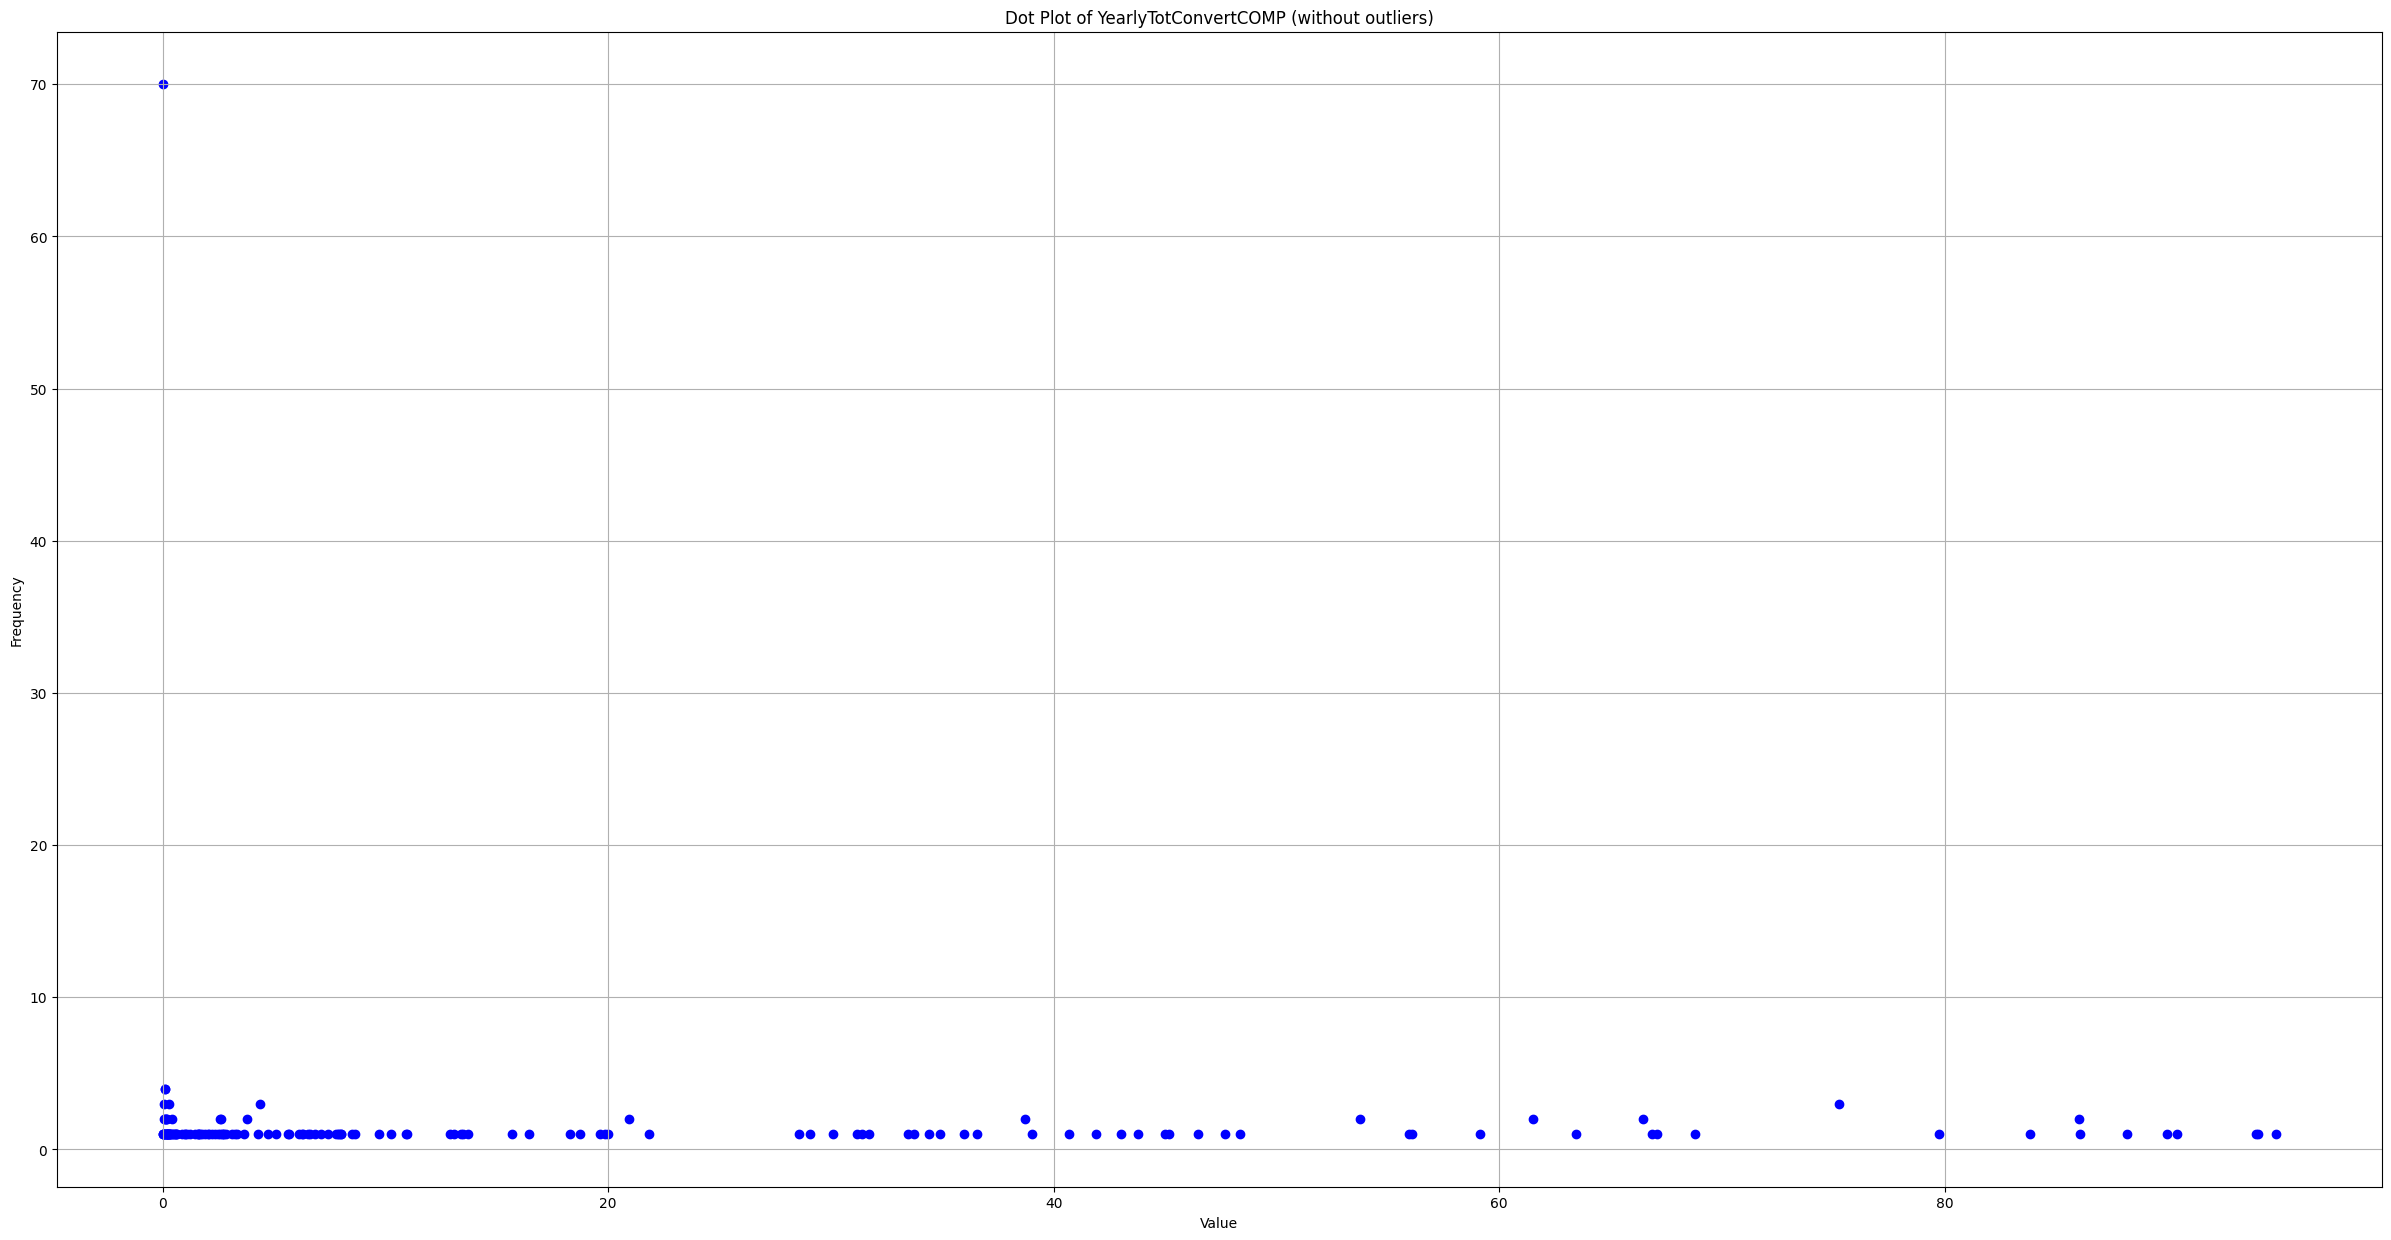

In [26]:
print(df_salary_test.shape)
df_salary_test['YearlyTotConvertCOMP'].value_counts()
#looking for why upper and lower bound are NAN
#df_salary_test['YearlyTotConvertCOMP'].isna().sum()
df_salary_test.dropna(subset=['YearlyTotConvertCOMP'], inplace=True)


data = df_salary_test['YearlyTotConvertCOMP']

#print(data.sort_values())
# Calculate the interquartile range (IQR)
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Define the lower and upper bounds to filter outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# messing around with bounds
#print(upper_bound) #255357.14285714287
 #print(lower_bound) #-92261.90476190478 subbing in zero becuase this is not helpful


# Filter the data to exclude outliers
filtered_data = data[(data >= 0) & (data <= 100)]

print(filtered_data)

# Create the dot plot
plt.figure(figsize=(30, 15))  # Adjust the figure size as needed
plt.scatter( filtered_data.value_counts().index.tolist(),filtered_data.value_counts().tolist(), color='b')

# Customize the plot
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.title('Dot Plot of YearlyTotConvertCOMP (without outliers)')

# Add a grid
plt.grid(True)

# Show the plot
plt.show()


-------shape before outliers removal--------
(64084, 80)
------------shape after outliers removal------------
(33561, 80)

This shows that 33561 out of 64084 individuals answered responsibly when giving salary. 

# Plan 1 
## To Gain Insights into the Distribution of Reported Salaries Across Different Countries:
- create individual box and whisker plots for each country and visualize them collectively.
    - calculate quartiles for each country
    - Issue----how to get them on one plot
- Combining with a summary of:
    -  Percent **Students** per country
        - group by country
        - occupation 'contains' student %
    - **YearsCode** vrs salaries, 
    - cost of living in each country 
    
    
    
 we can potentially uncover the sources of the prevalent near-zero salary values
 

# Plan 2 

## Relationship between salary and years of coding experience among respondents who claim expert level experience, possess higher education qualifications, and hail from first-world countries. Examining these factors collectively could provide valuable insights on data quality.

    - list of first world countries, remove others
    - remove any education below masters, Bachelors is the most common, but it is typical 
    - sort by years code take to quartile (maybe use 10+ years, considered expert level?)
    - plot salary vrs years code


In [7]:
#df_whole_45.columns

df_whole_45

# Quick clean up I found when doing reporting

#df_whole_45.rename(columns={'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)' : 'Secondary school'}, inplace=True)
#edlevel_counts.columns

df_whole_45.to_csv('df_whole_45.csv', index = False)

In [8]:
###  looking at YearsCode   ###:
#df_whole_45['YearsCode'].unique()

# Fix data in 'years code'
# Replacing/rewriting string responses with float values:
df_whole_45.loc[df_whole_45['YearsCode'] == 'Less than 1 year', 'YearsCode'] = 0
df_whole_45.is_copy = False
df_whole_45.loc[df_whole_45['YearsCode'] == 'More than 50 years', 'YearsCode'] = 51
df_whole_45.is_copy = False
# Ensuring Everything is a float, I had a few error messages to compete with.
df_whole_45.loc[:, 'YearsCode'] = df_whole_45['YearsCode'].astype(float)
#df_whole_45['YearsCode'] = df_whole_45['YearsCode'].astype(float)
# This is_copy = Fales is to cancel out errors/warnings I kept getting. 
df_whole_45.is_copy = False

#df_whole_45.loc[:, 'Age'] = df_whole_45['Age']
    
#checking again
#df_whole_45['YearsCode'].unique()
#df_whole_45.dropna(subset=['Age'], inplace=True)

#get Mean and Median
#display(df_whole_45['YearsCode'].mean())
#df_whole_45['YearsCode'].median()  

#Looking at results:
country_grp = df_whole_45.groupby(['Country'])
#country_grp['YearsCode'].mean().round(1)
#country_grp['YearsCode'].median().round(1)
country_grp['YearsCode'].agg(['mean', 'median']).round(1)
# checking participation 
country_grp['YearsCode'].count()


#yearsCode series added to df_45
Mean_YearsCode = country_grp['YearsCode'].mean().round(1).rename('Mean YearsCode')
Median_YearsCode = country_grp['YearsCode'].median().round(1).rename('Median YearsCode')
YearsCode_Count_NonNA = country_grp['YearsCode'].count().rename('YearsCode_Count NonNA')
df_45 = df_45.join(Mean_YearsCode, on='Country')
df_45 = df_45.join(Median_YearsCode, on='Country')
df_45 = df_45.join(YearsCode_Count_NonNA, on='Country')


C:\Users\Adison\AppData\Local\Temp\ipykernel_13284\128316929.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_whole_45.loc[:, 'YearsCode'] = df_whole_45['YearsCode'].astype(float)


25-34 years old       16320
35-44 years old        8667
18-24 years old        4210
45-54 years old        2992
55-64 years old        1061
65 years or older       158
Prefer not to say        45
Under 18 years old       37
Name: Age, dtype: int64

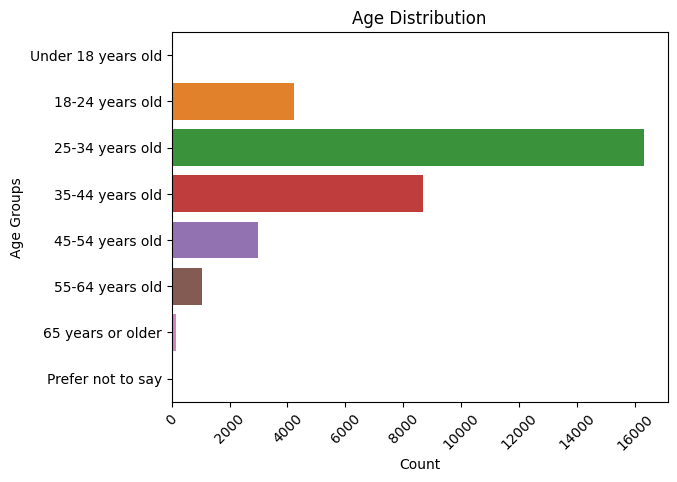

In [9]:
###  looking at age Distribution  ###:
df_whole_45['Age'].unique()
display(df_whole_45['Age'].value_counts())
age_counts = df_whole_45['Age'].value_counts()

#

age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]

sns.barplot(x=age_counts, y=age_counts.index, order=age_order, orient='h')

plt.ylabel('Age Groups')
plt.xlabel('Count')
plt.title('Age Distribution')
plt.xticks(rotation=45)
plt.show()


In [10]:
###  looking at age Distribution  ###:
# What is the data type? It is in ranges.
#df_whole_45['Age'].unique()
#df_whole_45['Age'].value_counts()

#looking at country group 'age'
#country_grp['Age'].value_counts().head(50)
# Note: after looking at the responses split by coutry, they all have the same most common answer of '25-34 years old'.
        # This is not helpful or intersting. I am going to replace each range with the year in the center of the range 
        # and then take the average. This will represent the spread and weight of the ages in each country.
        
def change_age(age):
    if pd.isna(age):
        return np.NaN
    elif age == "Prefer not to say":
        return np.NaN
    elif age == "Under 18 years old":
        return 16
    elif age == "18-24 years old":
        return 21
    elif age == "25-34 years old":
        return 29.5
    elif age == "35-44 years old":
        return 39.5
    elif age == "45-54 years old":
        return 49.5
    elif age == "55-64 years old":
        return 55.9
    elif age == "65 years or older":
        return 70
    else:
        raise ValueError("Invalid interval value: {}".format(age))    
        
# NOTE: Overwriting ages in df_whole_45 from ranges in to floats. This is permanant and need only run once per eval.
#       If "text Change_age already complete" appears then it has run already.


# Function to  change age, checks first if changes have been made to avoide errors.   
if df_whole_45.iloc[1]['Age'] in [16,21,29.5,39.5,49.5,55.9,70]:
        print("Change_age already complete")
else:df_whole_45.loc[:, 'Age'] = df_whole_45['Age'].apply(change_age)


#looking at age distribution after change, looks good
# df_whole_45['Age'].unique()
# df_whole_45['Age'].value_counts()
# country_grp['Age'].value_counts().head(50)

# Getting average by country:
#country_grp['Age'].mean().round(1)

# Recording participation: 
country_grp = df_whole_45.groupby(['Country'])
country_grp['Age'].count()

#Age series added to df_45
Mean_Age = country_grp['Age'].mean().round(1).rename('Mean Age')
Age_Count_NonNA = country_grp['Age'].count().rename('Age_Count NonNA')
df_45 = df_45.join(Mean_Age, on='Country')
df_45 = df_45.join(Age_Count_NonNA, on='Country')


C:\Users\Adison\AppData\Local\Temp\ipykernel_13284\3915088024.py:41: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  else:df_whole_45.loc[:, 'Age'] = df_whole_45['Age'].apply(change_age)


In [11]:
### Education level ###:
country_grp = df_whole_45.groupby(['Country'])
#country_grp['EdLevel'].unique()
#country_grp['EdLevel'].value_counts().head(40)
#country_grp = df_whole_45.groupby(['Country'])

Top_Education_per_country = country_grp['EdLevel'].apply(lambda x: x.value_counts().index[0])

# Replace original education levels with simplified versions:
replace_dict = {
    'Some college/university study without earning a degree': 'Some college',
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s'
}

# education level added to df_45 
Top_Education_per_country = Top_Education_per_country.replace(replace_dict).rename('Most_Common ED_Level')
df_45 = df_45.join(Top_Education_per_country, on='Country')
Ed_level_Count_NonNA= country_grp['EdLevel'].count().rename('Ed_level Count NonNA')
df_45 = df_45.join(Ed_level_Count_NonNA, on='Country')
print(Top_Education_per_country)

#updating df_whole_45 EdLevel
df_whole_45['EdLevel'] = df_whole_45['EdLevel'].replace(replace_dict)




Country
Argentina                                               Some college
Australia                                                 Bachelor’s
Austria                                                     Master’s
Bangladesh                                                Bachelor’s
Belgium                                                   Bachelor’s
Brazil                                                    Bachelor’s
Bulgaria                                                  Bachelor’s
Canada                                                    Bachelor’s
China                                                     Bachelor’s
Colombia                                                  Bachelor’s
Czech Republic                                              Master’s
Denmark                                                     Master’s
Egypt                                                     Bachelor’s
Finland                                                     Master’s
France                    

In [12]:
# get top listed language used, NOTE--This is not very interesting, nearly all JavaScript and HTML/CSS

#print(df_whole_45['LanguageHaveWorkedWith'].unique())
#df_whole_45['LanguageHaveWorkedWith'] = df_whole_45['LanguageHaveWorkedWith'].str.replace(',', ';')
#country_grp = df_whole_45.groupby(['Country'])
#country_grp = country_grp.apply({'LanguageHaveWorkedWith': lambda x: x.str.split(',')})
#print(country_grp['LanguageHaveWorkedWith'].value_counts())


df_whole_45['LanguageHaveWorkedWith'] = df_whole_45['LanguageHaveWorkedWith'].str.replace(',', ';')
#country_grp = df_whole_45.groupby('Country')['LanguageHaveWorkedWith'].apply(lambda x: x.str.split(';').explode().value_counts())
#print(country_grp.head(75))

country_grp = df_whole_45.groupby('Country')['LanguageHaveWorkedWith'].apply(lambda x: x.str.split(';').explode().value_counts())
top_languages = country_grp.groupby(level=0).nlargest(3)
top_languages.head(75)




#df_whole_45['LanguageHaveWorkedWith'] = df_whole_45['LanguageHaveWorkedWith'].str.replace(';', ',')

#country_grp = df_whole_45.groupby(['Country'])
#country_grp = country_grp.apply({'LanguageHaveWorkedWith': lambda x: x.str.split(',')})
#country_grp
#country_grp = country_grp.explode('LanguageHaveWorkedWith')
#counts = country_grp['LanguageHaveWorkedWith'].value_counts()

#country_grp['LanguageHaveWorkedWith'].value_counts()
#print(counts)


# make a copy of the DataFrame
#df_whole_45_copy = df_whole_45.copy()



# Split the values in the 'CodingActivities' column by the delimiter ';'
#country_grp = country_grp.agg({'LanguageHaveWorkedWith': lambda x: x.str.split([';',','])})



# Use the explode() method to create a new row for each value in the resulting lists


# Use the value_counts() method to count the occurrence of each value
#counts = country_grp['LanguageHaveWorkedWith'].value_counts()

#print(counts)

Country                       Country                                 
Argentina                     Argentina                     JavaScript     194
                                                            HTML/CSS       154
                                                            SQL            142
Australia                     Australia                     JavaScript     549
                                                            HTML/CSS       449
                                                            SQL            449
Austria                       Austria                       JavaScript     257
                                                            HTML/CSS       223
                                                            SQL            218
Bangladesh                    Bangladesh                    JavaScript     156
                                                            HTML/CSS       110
                                                            

This is an example of a table with a "multi-index" or "hierarchical index" which is used in pandas, a popular data analysis library in Python.

Think of it as a big table where each row represents a person who filled out a survey, and each column represents a piece of information they provided. In this case, the columns are "Country," "Language," and "Number of people."

The first column of the table is called "Country," which tells us which country the people who filled out the survey come from. The second column is also called "Country," but it is nested underneath the first column. This second "Country" column tells us the same thing as the first "Country" column, but it's used to group the data based on country.

So, for example, if we look at the row that says "Argentina" in the first "Country" column and "JavaScript" in the second "Country" column, we see that 194 people from Argentina listed JavaScript as a language they know.

Similarly, if we look at the row that says "Australia" in the first "Country" column and "HTML/CSS" in the second "Country" column, we see that 449 people from Australia listed HTML/CSS as a language they know.

This nested structure allows us to group and analyze the data in different ways, based on the level of detail we need.

In [13]:
# make a copy of the DataFrame
df_Lang = df.copy()

# Replace ';' with ','
df_Lang['LanguageHaveWorkedWith'] = df_Lang['LanguageHaveWorkedWith'].str.replace(';', ',')

# Split the 'LanguageHaveWorkedWith' column by ',' and explode the resulting list
df_Lang = df_Lang.assign(LanguageHaveWorkedWith=df_Lang['LanguageHaveWorkedWith'].str.split(',')).explode('LanguageHaveWorkedWith')

# Group by 'LanguageHaveWorkedWith', and count the occurrences
df_Lang = df_Lang.groupby(['LanguageHaveWorkedWith']).size().reset_index(name='Count')

# Sort by 'Count' in descending order
df_Lang = df_Lang.sort_values(['Count'], ascending=[False])

# Preview the resulting dataframe
print(df_Lang.head(75))

   LanguageHaveWorkedWith  Count
20             JavaScript  46443
17               HTML/CSS  39142
36                    SQL  35127
31                 Python  34155
40             TypeScript  24752
19                   Java  23644
2              Bash/Shell  20656
4                      C#  19883
5                     C++  16024
28                    PHP  14827
3                       C  13692
30             PowerShell   8575
15                     Go   7922
34                   Rust   6625
22                 Kotlin   6507
9                    Dart   4648
33                   Ruby   4299
1                Assembly   3887
39                  Swift   3489
32                      R   3308
41                    VBA   3185
25                 MATLAB   2913
24                    Lua   2867
16                 Groovy   2357
10                 Delphi   2311
37                  Scala   1837
27            Objective-C   1698
29                   Perl   1644
18                Haskell   1577
11        

In [14]:
df_whole_45

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly,CurrencyConvert,YearlyTotConvertCOMP
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,Master’s,Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14.00,5,Data scientist or machine learning specialist;...,20 to 99 employees,I have some influence,NaN,United Kingdom of Great Britain and Northern I...,GBP,32000.00,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,Collectives on Stack Overflow;Stack Overflow;S...,Multiple times per day,Yes,Multiple times per day,Neutral,29.50,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.00,0.82,39024.39
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,Bachelor’s,"Books / Physical media;School (i.e., Universit...",NaN,NaN,20.00,17,"Developer, full-stack",100 to 499 employees,I have some influence,Other (please specify):,Israel,ILS,60000.00,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,NaN,NaN,Jira Work Management;Trello,Jira Work Management;Trello,Slack;Zoom,Slack;Zoom,Very unfavorable,Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,A few times per week,"Yes, definitely",39.50,Man,No,Straight / Heterosexual,White,None of the above,None of the above,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.00,3.58,201117.32
9,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",I don’t code outside of work,Master’s,On the job training;Coding Bootcamp,NaN,NaN,6.00,6,"Developer, back-end",I don’t know,I have little or no influence,NaN,Netherlands,EUR,46000.00,Yearly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Emacs;Notepad++,Emacs;Notepad++,Windows,Windows,Git,Command-line;Dedicated version control GUI app...,NaN,NaN,Confluence;Jira Work Management,Confluence;Jira Work Management,Microsoft Teams,Microsoft Teams,Very unfavorable,Sta

In [15]:
df


,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,Daily or almost daily,Not sure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,Data scientist or machine learning specialist;...,20 to 99 employees,I have some influence,NaN,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,32000.00,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,Collectives on Stack Overflow;Stack Overflow;S...,Multiple times per day,Yes,Multiple times per day,Neutral,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.00
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,"Developer, full-stack",100 to 499 employees,I have some influence,Other (please specify):,Israel,ILS\tIsraeli new shekel,60000.00,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,N

<Axes: xlabel='YearlyTotConvertCOMP', ylabel='YearsCode'>

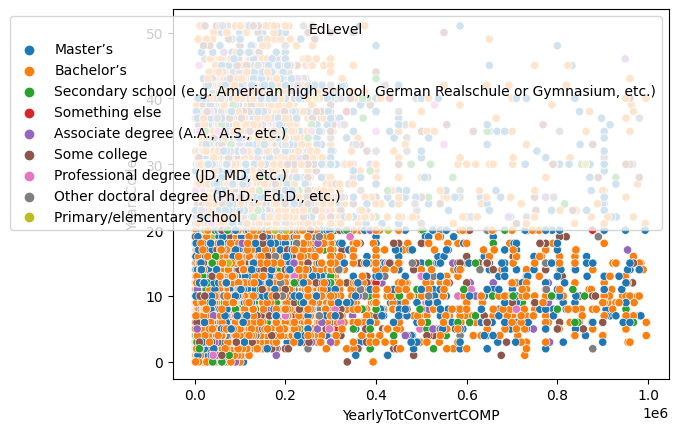

In [16]:
df_whole_45
sns.scatterplot(x = 'YearlyTotConvertCOMP', y = 'YearsCode', data = df_whole_45, hue = 'EdLevel' )

I want to look at a the top listed resposibilities by (contains developer), I think exploading it out makes it look like there are less developers, especially when it is put in percentages

In [17]:
# get top listed job (MainBranch):
#This is less intersting when devided by country, I want to make a pie chart of participation by listed responsibilites/job title.
df['DevType'].value_counts().head(40)
 
# make a copy of the DataFrame
df_copy = df.copy()

# drop NaN values
df_copy = df_copy.dropna(subset=['DevType'])

# Split the values in the 'CodingActivities' column by the delimiter ';'
df_copy['DevType'] = df_copy['DevType'].str.split(';')

# Use the explode() method to create a new row for each value in the resulting lists
df_copy = df_copy.explode('DevType')

# Use the value_counts() method to count the occurrence of each value
counts = df_copy['DevType'].value_counts()


# Divide each count by the total number of responses and multiply by 100 to get the percentage
percentages = (counts / len(df_copy)) * 100


print(percentages)


Developer, full-stack                           17.42
Developer, back-end                             16.14
Developer, front-end                             9.66
Developer, desktop or enterprise applications    5.79
Developer, mobile                                4.63
DevOps specialist                                3.74
Student                                          3.40
Cloud infrastructure engineer                    3.21
Database administrator                           2.99
System administrator                             2.98
Developer, embedded applications or devices      2.38
Project manager                                  2.36
Designer                                         2.28
Engineer, data                                   2.18
Engineering manager                              2.17
Data scientist or machine learning specialist    2.08
Data or business analyst                         1.94
Developer, QA or test                            1.88
Academic researcher         

In [18]:
# Count the rows containing 'Developer' in the 'DevType' column
count = df['DevType'].str.contains('Developer').sum()

# Print the count
print(f"Total number of rows containing 'Developer': {count}")

# Count the total number of non-null rows in the 'DevType' column
total_non_na_rows = df['DevType'].count()

# Print the count
print(f"Total number of non-null rows in 'DevType': {total_non_na_rows}")

#Print percent developers

perc = (count/total_non_na_rows)*100

print(f"Percentage Developers: {perc:.2f}%")


Total number of rows containing 'Developer': 51926
Total number of non-null rows in 'DevType': 61302
Percentage Developers: 84.71%


In [19]:
#taking a look at df_45
# gitting it ready for viewing in report file as a table
#df_45['Count'].sum() # answer is 64084

#df_45.columns 
#output :Index(['Country', 'Count', 'fully_remote_perc', 'Work_Location Count_nonNA', 'Mean Salary', 'Median Salary', 
#'Salary_Count NonNA', 'Mean YearsCode', 'Median YearsCode', 'YearsCode_Count NonNA', 'Mean Age', 'Age_Count NonNA', 
#'Most_Common ED_Level', 'Ed_level Count NonNA'],
   #   dtype='object')
    

#getting counts in percentages
    
df_45['Work_Loc Participation'] = df_45['Work_Location Count_nonNA']/df_45['Count']
df_45.loc[:, 'Work_Loc Participation'] =df_45['Work_Loc Participation'].map('{:.2%}'.format)

df_45['Salary Participation'] = df_45['Salary_Count NonNA']/df_45['Count']
df_45.loc[:, 'Salary Participation'] =df_45['Salary Participation'].map('{:.2%}'.format)

df_45['YC P'] = df_45['YearsCode_Count NonNA']/df_45['Count']
df_45.loc[:, 'YC P'] =df_45['YC P'].map('{:.2%}'.format)

df_45['Age P'] = df_45['Age_Count NonNA']/df_45['Count']
df_45.loc[:, 'Age P'] =df_45['Age P'].map('{:.2%}'.format)

df_45['ED P'] = df_45['Ed_level Count NonNA']/df_45['Count']
df_45.loc[:, 'ED P'] =df_45['ED P'].map('{:.2%}'.format)


df_45['Fully Remote'] = df_45['fully_remote_perc'].map('{:.2%}'.format)

df_45['Mean Salary'] = df_45['Mean Salary'].map('${:,.2f}'.format)
df_45['Median Salary'] = df_45['Median Salary'].map('${:,.2f}'.format)

# I am removing the below because the values are really too small to be visual. May be better represented by a bar graph?
#df_45["participation"] = df_45['Count']/64084
    
# rearrange/remove extra columns
# remove some of tehh participation columns they are all almost the same. It looks like if someone was willing to answer the salary question they answered the rest.
#['Country', 'Count','Fully Remote','Work_Loc P','Mean Salary', 'Median Salary','Sal P', 'Mean YearsCode', 'Median YearsCode','YC P','Mean Age','Age P','Most_Common ED_Level','ED P'
df_45_clean = df_45[['Country', 'Count','Fully Remote','Work_Loc Participation','Mean Salary', 'Median Salary','Salary Participation', 'Mean YearsCode', 'Median YearsCode','Mean Age','Most_Common ED_Level']]

df_45_clean.set_index('Country', inplace=True)



In [20]:
df_45_clean.to_csv("df_45_clean.csv", index=True)
df_45_clean


,Count,Fully Remote,Work_Loc Participation,Mean Salary,Median Salary,Salary Participation,Mean YearsCode,Median YearsCode,Mean Age,Most_Common ED_Level
Country,,,,,,,,,,
United States of America,13543,58.23%,85.87%,"$160,561.30","$140,000.00",60.58%,16.90,14.00,36.30,Bachelor’s
India,6639,39.84%,73.79%,"$38,270.20","$18,223.80",31.81%,8.80,8.00,28.20,Bachelor’s
Germany,5395,34.39%,83.97%,"$98,732.30","$69,677.40",53.20%,15.60,14.00,33.80,Master’s
United Kingdom of Great Britain and Northern Ireland,4190,42.85%,85.32%,"$132,061.60","$79,268.30",61.17%,16.40,14.00,34.80,Bachelor’s
Canada,2490,62.40%,84.18%,"$107,117.40","$86,861.30",56.99%,16.00,14.00,35.00,Bachelor’s
France,2328,23.03%,83.93%,"$78,165.20","$51,612.90",58.33%,13.80,12.00,32.60,Master’s
Brazil,2109,66.77%,88.62%,"$39,287.40","$25,142.90",60.41%,12.20,10.00,31.50,Bachelor’s
Poland,1732,54.61%,83.83%,"$57,862.60","$46,419.10",56.29%,12.40,11.00,31.60,Master’s
Netherlands,1555,18.74%,85.79%,"$93,454.00","$64,828.00",57.04%,15.30,13.00,33.80,Bachelor’s


df_45_clean

In [21]:
import pandas as pd

def color_coding(value):
    if isinstance(value, str):
        return 'background-color: {}'.format(value)
    
    if value <= 0.25:
        return 'background-color: red'
    elif value <= 0.50:
        return 'background-color: yellow'
    elif value <= 0.75:
        return 'background-color: green'
    else:
        return 'background-color: darkgreen'

# Apply the color coding function to the DataFrame
df_styled = df_45_clean.style.applymap(color_coding, subset=['Work_Loc P','Sal P','YC P','Age P','ED P'])

# Display the styled DataFrame



#df_styled.loc[:, 'Work_Loc P'] =df_45['Work_Loc P'].map('{:.2%}'.format)


#df_styled.loc[:, 'Sal P'] =df_45['Sal P'].map('{:.2%}'.format)


#df_styled.loc[:, 'YC P'] =df_45['YC P'].map('{:.2%}'.format)


#df_styledloc[:, 'Age P'] =df_45['Age P'].map('{:.2%}'.format)


#df_styled.loc[:, 'ED P'] =df_45['ED P'].map('{:.2%}'.format)



# Save the DataFrame to a html file
#df_styled.to_html("df_styled.html", index=False) ##done


df_styled

KeyError: "None of [Index(['Work_Loc P', 'Sal P', 'YC P', 'Age P', 'ED P'], dtype='object')] are in the [columns]"

<Axes: xlabel='Median Salary', ylabel='Mean Age'>

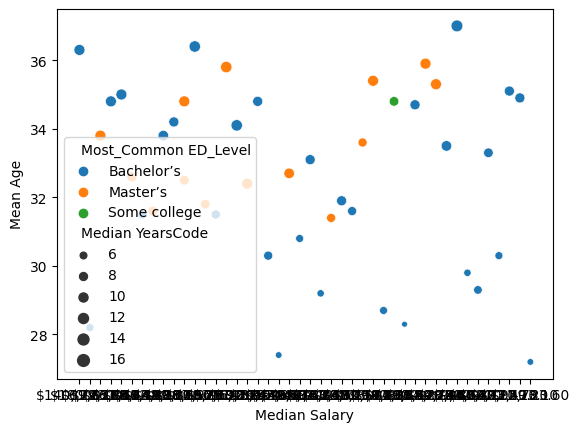

In [22]:
sns.scatterplot(x = 'Median Salary', y = 'Mean Age', data = df_45, hue = "Most_Common ED_Level", size = 'Median YearsCode' )

In [23]:
# make a copy of the DataFrame
df_copy = df.copy()

# Replace NaN values with an empty string
df_copy['CodingActivities'] = df_copy['CodingActivities'].fillna('')

# Split the values in the 'CodingActivities' column by the delimiter ';'
df_copy['CodingActivities'] = df_copy['CodingActivities'].str.split(';')

# Use the explode() method to create a new row for each value in the resulting lists
df_copy = df_copy.explode('CodingActivities')

# Use the value_counts() method to count the occurrence of each value
counts = df_copy['CodingActivities'].value_counts()

print(counts)

Hobby                                 42922
Contribute to open-source projects    15378
                                      14369
Freelance/contract work               13305
School or academic work                8561
Bootstrapping a business               8401
I don’t code outside of work           7311
Other (please specify):                2179
Name: CodingActivities, dtype: int64
